In [1]:
library('tidyverse')
library("palmerpenguins")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


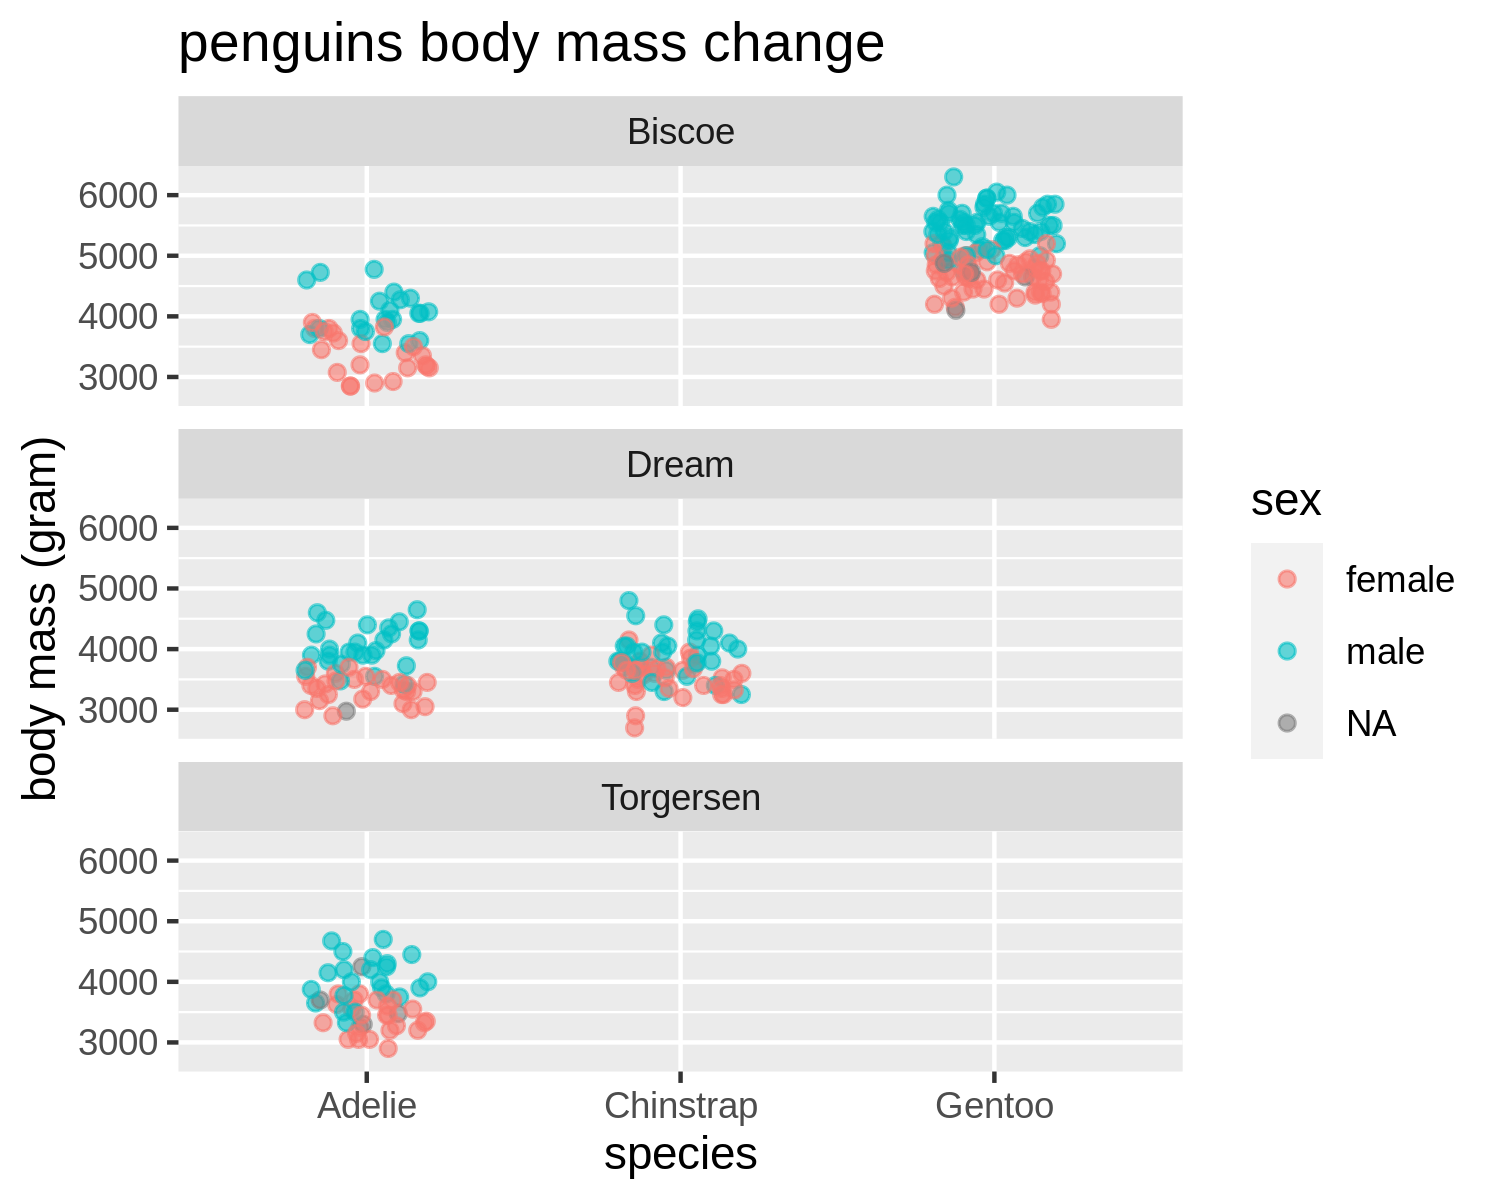

In [3]:
p = ggplot(penguins, aes(x=species, y = body_mass_g, color = sex)) + 
  geom_point(position = position_jitter(height = 0.3, width = 0.2), alpha = 0.6,na.rm = TRUE) +
  labs(y = 'body mass (gram)', title = 'penguins body mass change') +
  facet_wrap(~island, nrow = 3) 
p


In [4]:
#go to terminal in jupyter and type: mamba install -c conda-forge r-gganimate
library('gganimate')
library('IRdisplay')


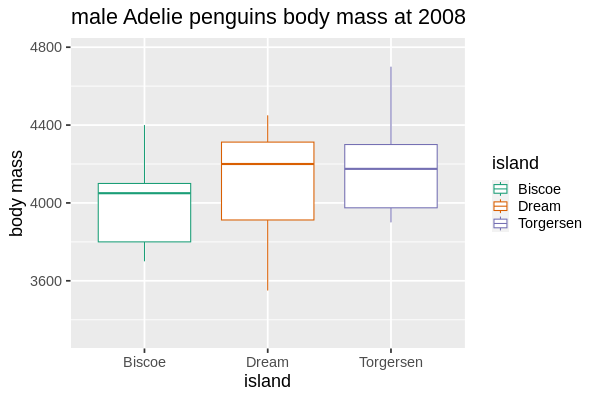

In [5]:
display_gif <- function(gganim, ...){
  
  raw = suppressMessages(animate(gganim, ...))
  
  contents <- base64enc::base64encode(raw)
  tag <- '<img src="data:image/gif;base64,%s">'
  
  IRdisplay::display_html(sprintf(tag, contents))
  
}

theme_set(theme_gray(base_size = 18))

adelie = penguins|> filter(species == "Adelie", year > 2007, sex == 'male') 
anim = ggplot(adelie , aes(x = island, y = body_mass_g, colour = island)) + 
  geom_boxplot(na.rm = TRUE) +
  scale_color_brewer(palette = 'Dark2') +
  labs(x = 'island', y = 'body mass') +
  ggtitle('male Adelie penguins body mass at {closest_state}') +
  transition_states(year,
                    transition_length = 2,
                    state_length = 1) + 
  enter_fade() + 
  exit_shrink()

display_gif(anim, w = 600, h = 400)

In [35]:
year = penguins|> filter(year == 2008, island == "Biscoe") |> 
   mutate(flipper_group = case_when(flipper_length_mm >= 220 ~ "length >= 220",
                                    flipper_length_mm >= 210 ~ "210 - 220",
                                    flipper_length_mm >= 200 ~ "200 - 210",
                                    flipper_length_mm >= 190 ~ "190 - 200",
                                    flipper_length_mm >= 180  ~ "180 - 190")) |> group_by(flipper_group) |>
   mutate(count = n()) |> ungroup() |> arrange(desc(count)) |> mutate(flipper_group = flipper_group |> 
                                                     fct_inorder() |> fct_rev())

head(year)



species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_group,count
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<fct>,<int>
Gentoo,Biscoe,49.1,14.8,220,5150,female,2008,length >= 220,21
Gentoo,Biscoe,48.4,16.3,220,5400,male,2008,length >= 220,21
Gentoo,Biscoe,49.6,16.0,225,5700,male,2008,length >= 220,21
Gentoo,Biscoe,50.5,15.9,222,5550,male,2008,length >= 220,21
Gentoo,Biscoe,50.5,15.9,225,5400,male,2008,length >= 220,21
Gentoo,Biscoe,48.5,14.1,220,5300,male,2008,length >= 220,21


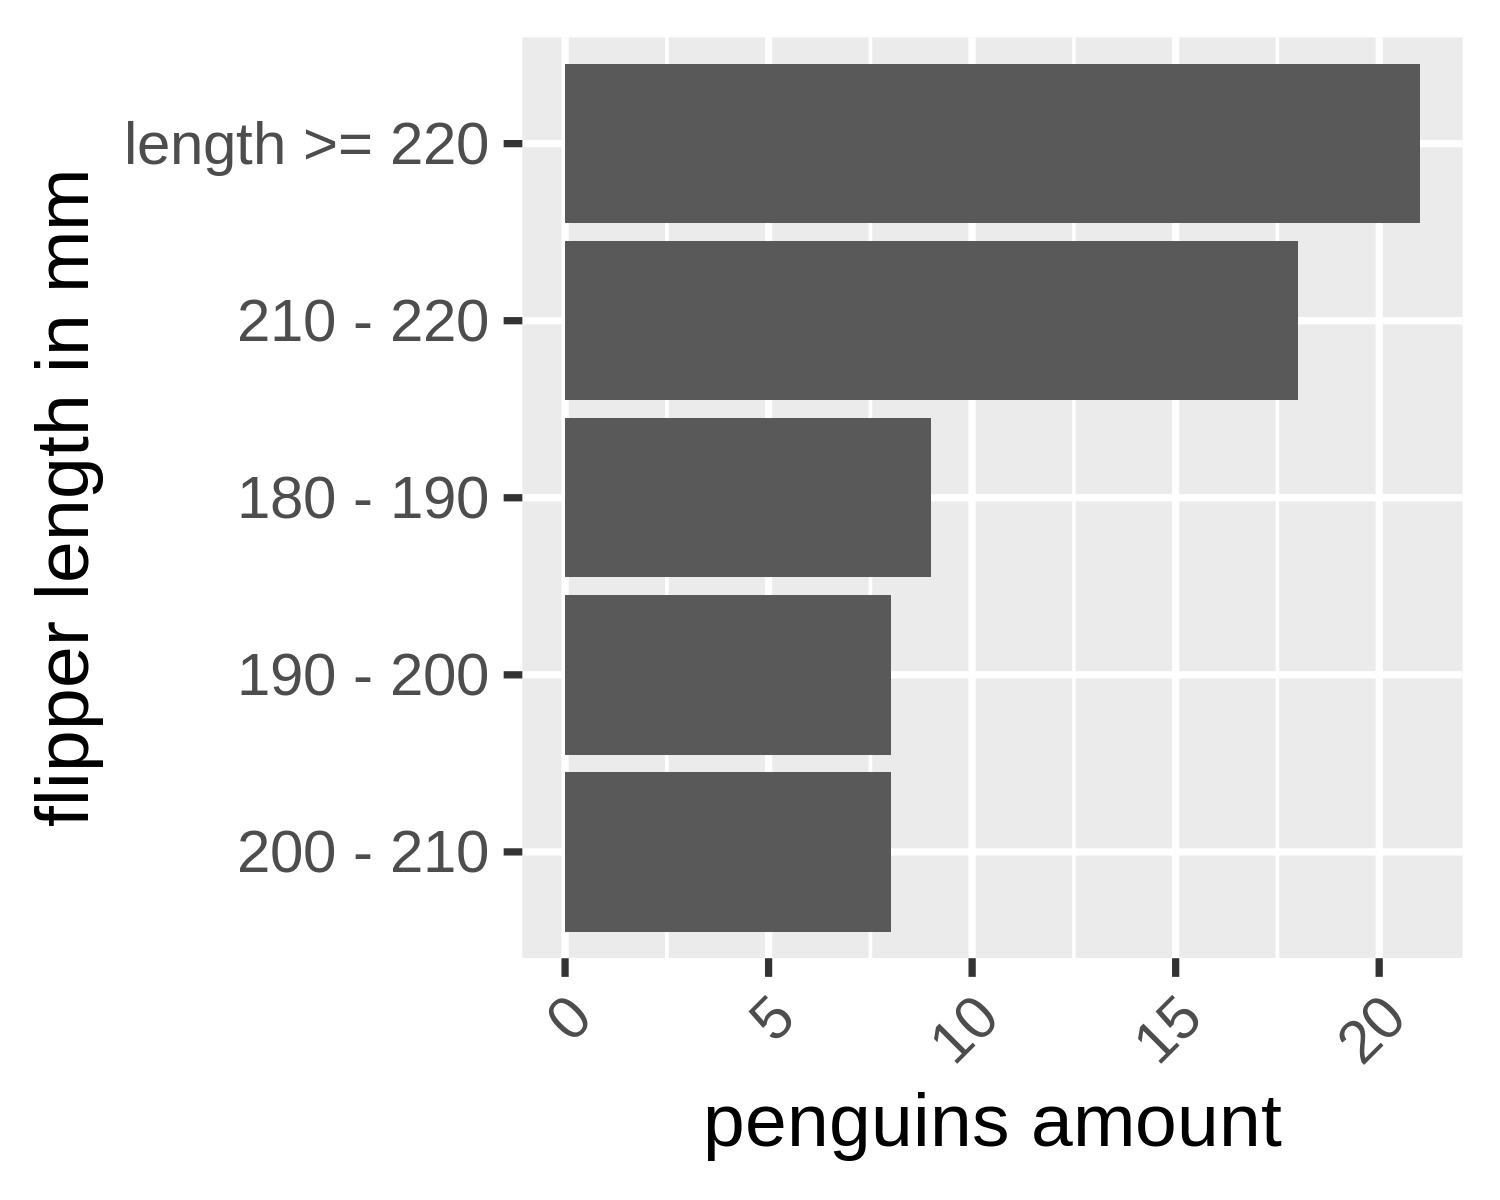

In [41]:
p = ggplot(year, aes(y= flipper_group)) +
    geom_bar() +
    labs (y = 'flipper length in mm', x = 'penguins amount') +
    theme(axis.text.x=element_text(angle=45,hjust=1)) 

p

In [ ]:
#in this penguins data, there are 3 penguins species: Adelie, Chinstrap, and Gentoo; 
# and 3 island: Torgersen, Dream, Biscoe. From the chatrs above, species Adelie exists in all three islands.
# Species Chinstrap only exists on Dream island and species Gentoo only exists on Biscoe island. 
# For each species, male's body mass is significantly higher than female. 
# For species Adelie, during 2008- 2009 period, there is a body mass increase for this species on island Biscoe 
# and a body mass desrease on island Dream and Torgersen. 
# Specifically, on island Biscoe at 2008, there are 21 penguins whose flipper length are over 220 mm. 
